In [1]:
import re
import ast
import emot
import nltk
import string
import pycountry
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
d1 = pd.read_csv("missingbaby.csv")
d2 = pd.read_csv("timefices11.csv")
d3 = pd.read_csv("scraped_tweets_missingbaby.csv")
pd.set_option('float_format', '{:.0f}'.format)

In [3]:
d3['tweetdate'] = d2['date']

In [4]:
d1 = d1.drop(columns=['Unnamed: 0','IDreplyTo'])

In [5]:
d3 = d3.drop(columns=['Unnamed: 0'])

In [6]:
data = pd.merge(d1, d3, on=['username', 'description', 'location', 'link','text','hashtags','tweetdate','following','followers','totaltweets','retweetcount'], how='outer')


In [7]:
len(data)

12849

In [8]:
data.sort_values(by='followers', ascending=False)[['username', 'followers']].drop_duplicates(subset='username').head(20)


,username,followers
7066,cnnbrk,64195142
7116,CNN,61267702
2868,BBCBreaking,51687011
1042,BBCWorld,39627731
2901,BBCNews,15068897
7114,cnni,14473199
11026,HuffPost,11204819
2763,guardian,10898010
11188,CBSNews,8918937
2871,SkyNews,8375913


In [9]:
pd.set_option('float_format', '{:.0f}'.format)

print('Sort By retweets:')
sort_retweets = data.sort_values(by='tweetdate')[['username', 'text','retweetcount','link']].drop_duplicates(subset='text')
sort_retweets = sort_retweets.sort_values(by='retweetcount', ascending=False).head(10)

for i in (sort_retweets['link']):
    print(i)

sort_retweets


Sort By retweets:
https://twitter.com/i/web/status/1631025799716298752
https://twitter.com/i/web/status/1631008020128837633
https://twitter.com/i/web/status/1631007811827032064
https://twitter.com/i/web/status/1630611007184814094
https://twitter.com/i/web/status/1630616167139229720
https://twitter.com/i/web/status/1631680877234212864
https://twitter.com/i/web/status/1631379997796474887
https://twitter.com/i/web/status/1630550474612002816
https://twitter.com/i/web/status/1630509251578810370
https://twitter.com/i/web/status/1631306626228449288


,username,text,retweetcount,link
7538,DrProudman,The media assumes that privileged aristocrats ...,329,https://twitter.com/i/web/status/1631025799716...
8515,BBCBreaking,Baby's body found by UK police searching for m...,241,https://twitter.com/i/web/status/1631008020128...
8533,SkyNews,BREAKING: Police have found the remains of a b...,178,https://twitter.com/i/web/status/1631007811827...
10782,BBCBreaking,Constance Marten and Mark Gordon arrested on s...,95,https://twitter.com/i/web/status/1630611007184...
10622,metpoliceuk,Constance Marten and Mark Gordon further arres...,90,https://twitter.com/i/web/status/1630616167139...
1044,BBCBreaking,Couple Constance Marten and Mark Gordon appear...,88,https://twitter.com/i/web/status/1631680877234...
5280,BBCBreaking,Constance Marten and Mark Gordon charged with ...,86,https://twitter.com/i/web/status/1631379997796...
11530,DonnaDlm71,If you think the arrest of Mark Gordon &amp; C...,83,https://twitter.com/i/web/status/1630550474612...
11952,OldHighburyN5,Update : Constance Marten &amp; Mark Gordon re...,78,https://twitter.com/i/web/status/1630509251578...
2905,BBCBreaking,Police questioning Constance Marten and Mark G...,71,https://twitter.com/i/web/status/1631306626228...


In [10]:
print('Sort By likes:')
sort_likes = data.sort_values(by='likes', ascending=False)[['text','likes','link']].drop_duplicates(subset='text').head(10)
    
for i in (sort_likes['link']):
    print(i)

sort_likes

Sort By likes:
https://twitter.com/i/web/status/1631343495771299853
https://twitter.com/i/web/status/1633764680756854784
https://twitter.com/i/web/status/1631887766433718274
https://twitter.com/i/web/status/1631276490028380161
https://twitter.com/i/web/status/1631380444343050244
https://twitter.com/i/web/status/1631333271077363729
https://twitter.com/i/web/status/1631527454383783937
https://twitter.com/i/web/status/1631732120480542720
https://twitter.com/i/web/status/1631739012393173010
https://twitter.com/i/web/status/1631319333757657091


,text,likes,link
2528,The media assumes that privileged aristocrats ...,3333,https://twitter.com/i/web/status/1631343495771...
23,Baby's body found by UK police searching for m...,877,https://twitter.com/i/web/status/1633764680756...
472,Constance Marten and Markl Gordon's baby was a...,687,https://twitter.com/i/web/status/1631887766433...
3020,Constance Marten and Mark Gordon…\nFuck you. F...,598,https://twitter.com/i/web/status/1631276490028...
2267,Constance Marten and Mark Gordon charged with ...,550,https://twitter.com/i/web/status/1631380444343...
2584,Bring back the death penalty for Constance Mar...,541,https://twitter.com/i/web/status/1631333271077...
1582,A special place in hell for Mark Gordon and Co...,499,https://twitter.com/i/web/status/1631527454383...
702,Couple Constance Marten and Mark Gordon appear...,455,https://twitter.com/i/web/status/1631732120480...
675,Not the most diplomatic tweet ever... but fuck...,412,https://twitter.com/i/web/status/1631739012393...
2701,BREAKING: Police have found the remains of a b...,365,https://twitter.com/i/web/status/1631319333757...


In [11]:
dates = []
for i in d2['date']:
    try:
        if '2023' in i:
            dates.append(i)
        else:
            dates.append(np.nan)
    except:
        dates.append(np.nan)

In [12]:
d2['tweetdate'] = dates

In [13]:
print('sort by time:')
sort_times = d2.sort_values(by='tweetdate')[['link','text','tweetdate']].drop_duplicates(subset='text').head(10)
    
for i in (sort_times['link']):
    print(i)
    
sort_times


sort by time:
https://twitter.com/i/web/status/1629944114379919360
https://twitter.com/i/web/status/1630382776175276033
https://twitter.com/i/web/status/1630384179434205186
https://twitter.com/i/web/status/1630384756016705537
https://twitter.com/i/web/status/1630385437431984128
https://twitter.com/i/web/status/1630386025187999750
https://twitter.com/i/web/status/1630387035713204224
https://twitter.com/i/web/status/1630387448755699713
https://twitter.com/i/web/status/1630389630615822338
https://twitter.com/i/web/status/1630390340313071618


,link,text,tweetdate
9800,https://twitter.com/i/web/status/1629944114379...,https://t.co/T1lQ24hHwC\nUK cult expert says N...,2023-02-26 20:38:54+00:00
9799,https://twitter.com/i/web/status/1630382776175...,#UPDATE | Constance Marten and Mark Gordon wer...,2023-02-28 01:41:59+00:00
9794,https://twitter.com/i/web/status/1630384179434...,BREAKING: Constance Marten and Mark Gordon hav...,2023-02-28 01:47:34+00:00
9792,https://twitter.com/i/web/status/1630384756016...,Appears @sussex_police is assisting @metpolice...,2023-02-28 01:49:51+00:00
9790,https://twitter.com/i/web/status/1630385437431...,Missing aristocrat Constance Marten and lover ...,2023-02-28 01:52:34+00:00
9789,https://twitter.com/i/web/status/1630386025187...,Sussex Police say missing aristocrat Constance...,2023-02-28 01:54:54+00:00
9786,https://twitter.com/i/web/status/1630387035713...,Police say missing aristocrat Constance Marten...,2023-02-28 01:58:55+00:00
9781,https://twitter.com/i/web/status/1630387448755...,Missing aristocrat Constance Marten and lover ...,2023-02-28 02:00:33+00:00
9779,https://twitter.com/i/web/status/1630389630615...,Missing couple Constance Marten and Mark Gordo...,2023-02-28 02:09:13+00:00
9776,https://twitter.com/i/web/status/1630390340313...,Constance Marten and partner Mark Gordon found...,2023-02-28 02:12:02+00:00


In [14]:

d1['datetime'] = pd.to_datetime(d1['tweetdate'])


In [15]:
d2['datetime'] = pd.to_datetime(d2['date'])


In [16]:
a = d1[['datetime','text','link']]

In [17]:
b = d2[['datetime','text','link']]

In [89]:
# group by date ignoring hour, minute, and second
dfa_grouped = data.groupby(pd.to_datetime(a['datetime']).dt.date).size()


In [90]:
# group by date ignoring hour, minute, and second
dfb_grouped = data.groupby(pd.to_datetime(b['datetime']).dt.date).size()


In [91]:
summed_series = dfa_grouped.add(dfb_grouped, fill_value=0)
summed_series

datetime
2023-02-26      1
2023-02-28   2892
2023-03-01   3011
2023-03-02   3369
2023-03-03   2372
2023-03-04    415
2023-03-05    303
2023-03-06    100
2023-03-07     29
2023-03-08     19
2023-03-09     36
2023-03-10      3
2023-03-11      3
dtype: float64

In [69]:
x=[]
x_values = pd.date_range(start='2023-02-26', end='2023-03-12', freq='3D')
for i in x_values:
    x.append(str(i.strftime("%Y-%m-%d")))

In [70]:
x_values

DatetimeIndex(['2023-02-26', '2023-03-01', '2023-03-04', '2023-03-07',
               '2023-03-10'],
              dtype='datetime64[ns]', freq='3D')

In [71]:
summed_series.index = pd.to_datetime(summed_series.index)

y_values = summed_series.resample('3D').sum()
y_values

datetime
2023-02-26   2893
2023-03-01   8752
2023-03-04    818
2023-03-07     84
2023-03-10      6
Freq: 3D, dtype: float64

In [72]:
counts = y_values.to_list()
y_values

datetime
2023-02-26   2893
2023-03-01   8752
2023-03-04    818
2023-03-07     84
2023-03-10      6
Freq: 3D, dtype: float64

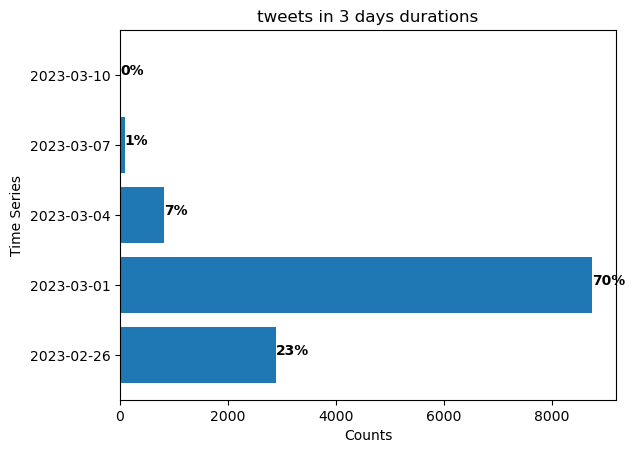

In [83]:
import math
# Calculate percentages
total_counts = sum(counts)
percentages = [count/total_counts * 100 for count in counts]

# Create horizontal bar chart
fig, ax = plt.subplots()
ax.barh(x, counts)

# Add labels and title
ax.set_xlabel('Counts')
ax.set_ylabel('Time Series')
ax.set_title('tweets in 3 days durations')

for i, v in enumerate(counts):
    ax.text(v, i, str(round(percentages[i])) + '%', color='black', fontweight='bold')

# Show plot
plt.show()

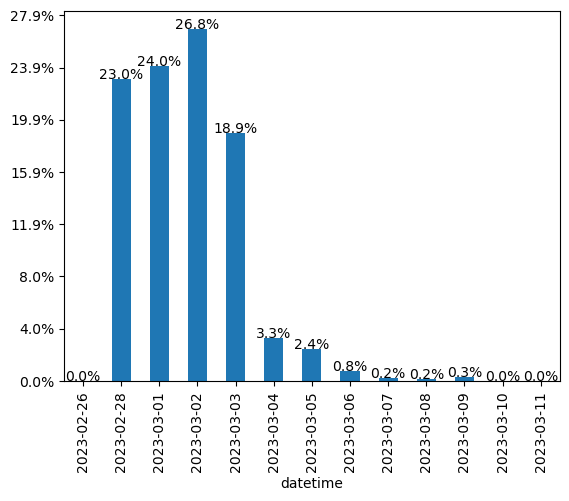

In [93]:
# create bar chart with percent labels
fig, ax = plt.subplots()
ax = summed_series.plot(kind='bar', ax=ax)

# set y-axis label formatter to percent
fmt = mtick.PercentFormatter(xmax=summed_series.sum())
ax.yaxis.set_major_formatter(fmt)

# add labels to bars
for i, v in enumerate(summed_series):
    ax.text(i, v+1, f"{v/summed_series.sum()*100:.1f}%", ha='center')

# show plot
plt.show()